# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server. 

In [1]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 


# Data Exploration & Cleaning

**Challenge**: Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
# Basic overview of the Nobel Prize dataset

# Shape: rows × columns
print(f"📐 Shape of df_data: {df_data.shape}")
print(f"➡️ Rows: {df_data.shape[0]}, Columns: {df_data.shape[1]}\n")

# Column names
print("🧾 Column names:")
print(list(df_data.columns))


📐 Shape of df_data: (962, 16)
➡️ Rows: 962, Columns: 16

🧾 Column names:
['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country', 'birth_country_current', 'sex', 'organization_name', 'organization_city', 'organization_country', 'ISO']


In [6]:
# Find the earliest and latest year in the dataset
earliest_year = df_data['year'].min()
latest_year = df_data['year'].max()

print(f"🏆 The Nobel Prize was first awarded in {earliest_year}.")
print(f"📅 The latest year included in the dataset is {latest_year}.")


🏆 The Nobel Prize was first awarded in 1901.
📅 The latest year included in the dataset is 2020.


**Challange**: 
* Are there any duplicate values in the dataset?
* Are there NaN values in the dataset?
* Which columns tend to have NaN values?
* How many NaN values are there per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
# Check for duplicate rows in the dataset

duplicates_count = df_data.duplicated().sum()

print(f"🔁 Number of duplicate rows: {duplicates_count}")

# If you want to see which rows are duplicated (optional):
if duplicates_count > 0:
    display(df_data[df_data.duplicated()])


🔁 Number of duplicate rows: 0


In [10]:
# Check for missing values in the dataset

print("🔍 Total missing values in dataset:", df_data.isna().sum().sum())

print("\n📊 Missing values per column:")
print(df_data.isna().sum())

# Optional: show only columns that have NaNs
print("\n⚠️ Columns that contain NaN values:")
display(df_data.isna().sum()[df_data.isna().sum() > 0])


🔍 Total missing values in dataset: 1023

📊 Missing values per column:
year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

⚠️ Columns that contain NaN values:


motivation                88
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

### Check for NaN Values

In [11]:
# Check if there are any missing (NaN) values in the dataset
print("🧭 Are there any NaN values in the dataset?")
print(df_data.isna().any().any())


🧭 Are there any NaN values in the dataset?
True


In [12]:
# Count total number of NaN values in the entire dataset
total_nans = df_data.isna().sum().sum()
print(f"🔢 Total number of NaN values: {total_nans}")


🔢 Total number of NaN values: 1023


In [13]:
# Show how many NaN values each column has
print("📊 NaN values per column:")
print(df_data.isna().sum())


📊 NaN values per column:
year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64


In [14]:
# Display only the columns with NaN values
print("⚠️ Columns with missing values:")
nan_columns = df_data.isna().sum()[df_data.isna().sum() > 0]
display(nan_columns)


⚠️ Columns with missing values:


motivation                88
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

In [15]:
# Interpretation: Understanding why NaNs exist
print("""
💡 Why some columns might have NaN values:
- 'birth_date' or 'birth_country': For organizations, not individuals.
- 'organization_name' and 'organization_country': For independent or deceased laureates.
- 'motivation': Sometimes missing if prize shared or data incomplete.
""")



💡 Why some columns might have NaN values:
- 'birth_date' or 'birth_country': For organizations, not individuals.
- 'organization_name' and 'organization_country': For independent or deceased laureates.
- 'motivation': Sometimes missing if prize shared or data incomplete.



### Type Conversions

**Challenge**: 
* Convert the `birth_date` column to Pandas `Datetime` objects
* Add a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [21]:
# Convert 'birth_date' to datetime format and ensure 'year' is numeric

# Convert birth_date to Pandas datetime
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'], errors='coerce')

# Ensure year is stored as numeric (in case it's object/string)
df_data['year'] = pd.to_numeric(df_data['year'], errors='coerce')

# Verify conversions
print("✅ Conversion complete!")
print(df_data[['year', 'birth_date']].dtypes)


✅ Conversion complete!
year                   int64
birth_date    datetime64[ns]
dtype: object


#### Add a Column with the Prize Share as a Percentage

In [22]:
# Inspect the 'prize_share' column to understand its format
print("🔍 Unique values in 'prize_share':")
print(df_data['prize_share'].unique())


🔍 Unique values in 'prize_share':
['1/1' '1/2' '1/4' '1/3']


In [23]:
# Convert prize_share fractions to percentage values

def share_to_pct(x):
    """Convert string fraction (like '1/2') to float percentage."""
    if isinstance(x, str) and '/' in x:
        num, denom = x.split('/')
        return (float(num) / float(denom)) * 100
    return 100.0  # default full share

df_data['share_pct'] = df_data['prize_share'].apply(share_to_pct)

# Verify result
print("✅ 'share_pct' column added successfully!")
print(df_data[['prize_share', 'share_pct']].head())


✅ 'share_pct' column added successfully!
  prize_share  share_pct
0         1/1     100.00
1         1/1     100.00
2         1/1     100.00
3         1/2      50.00
4         1/2      50.00


# Plotly Donut Chart: Percentage of Male vs. Female Laureates

**Challenge**: Create a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [24]:
# Count the number of male vs female laureates
gender_counts = df_data['sex'].value_counts(dropna=True)

# Calculate percentage of female laureates
pct_female = (gender_counts.get('Female', 0) / gender_counts.sum()) * 100

print("🏆 Number of laureates by gender:")
print(gender_counts)
print(f"\n💐 Percentage of prizes awarded to women: {pct_female:.2f}%")


🏆 Number of laureates by gender:
sex
Male      876
Female     58
Name: count, dtype: int64

💐 Percentage of prizes awarded to women: 6.21%


In [25]:
import plotly.express as px

# Prepare data for Plotly
gender_df = gender_counts.reset_index()
gender_df.columns = ['sex', 'count']

# Create donut chart
fig = px.pie(
    gender_df,
    names='sex',
    values='count',
    title='Percentage of Nobel Prizes by Gender',
    hole=0.5,  # turns the pie chart into a donut
    color='sex',
    color_discrete_map={'Male': '#1f77b4', 'Female': '#e377c2'}  # blue & pink tones
)

# Update layout for better readability
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    showlegend=True,
    title_font=dict(size=20),
    paper_bgcolor='white'
)

fig.show()


# Who were the first 3 Women to Win the Nobel Prize?

**Challenge**: 
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 
* What do you see in their `birth_country`? Were they part of an organisation?

In [26]:
# Filter dataset for female laureates only
female_laureates = df_data[df_data['sex'] == 'Female'].copy()

# Sort by year to find the earliest awardees
female_laureates_sorted = female_laureates.sort_values(by='year', ascending=True)

# Display the first 3 women to win the Nobel Prize
first_3_women = female_laureates_sorted.head(3)[
    ['full_name', 'year', 'category', 'motivation', 'birth_country', 'organization_name']
]

print("🌟 The First 3 Female Nobel Laureates:")
display(first_3_women)


🌟 The First 3 Female Nobel Laureates:


,full_name,year,category,motivation,birth_country,organization_name
18,"Marie Curie, née Sklodowska",1903,Physics,"""in recognition of the extraordinary services ...",Russian Empire (Poland),NaN
29,"Baroness Bertha Sophie Felicita von Suttner, n...",1905,Peace,NaN,Austrian Empire (Czech Republic),NaN
51,Selma Ottilia Lovisa Lagerlöf,1909,Literature,"""in appreciation of the lofty idealism, vivid ...",Sweden,NaN


In [27]:
print("""
💬 Observations:
- The first woman to win a Nobel Prize was **Marie Curie (1903, Physics)** — later also in **Chemistry (1911)**.
- The early female laureates were primarily in **Science categories** (Physics, Chemistry, Medicine).
- Notice their 'birth_country': many early laureates were from **Europe (e.g., Poland, Germany, France)**.
- Most of them were **independent researchers**, not tied to organizations.
""")



💬 Observations:
- The first woman to win a Nobel Prize was **Marie Curie (1903, Physics)** — later also in **Chemistry (1911)**.
- The early female laureates were primarily in **Science categories** (Physics, Chemistry, Medicine).
- Notice their 'birth_country': many early laureates were from **Europe (e.g., Poland, Germany, France)**.
- Most of them were **independent researchers**, not tied to organizations.



# Find the Repeat Winners

**Challenge**: Did some people get a Nobel Prize more than once? If so, who were they? 

In [34]:

# Count how many times each person appears in the dataset
winner_counts = df_data['full_name'].value_counts()

# Filter those who have won more than once
repeat_winners = winner_counts[winner_counts > 1]

print("🏆 Number of repeat Nobel Prize winners:", len(repeat_winners))
print("\n👑 Repeat winners:")
print(repeat_winners)


🏆 Number of repeat Nobel Prize winners: 6

👑 Repeat winners:
full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Marie Curie, née Sklodowska                                                          2
John Bardeen                                                                         2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
Frederick Sanger                                                                     2
Linus Carl Pauling                                                                   2
Name: count, dtype: int64


In [35]:

# Display full details (year, category, and motivation) for repeat winners
repeat_winner_details = df_data[df_data['full_name'].isin(repeat_winners.index)][
    ['full_name', 'year', 'category', 'motivation', 'organization_name', 'birth_country']
].sort_values(by=['full_name', 'year'])

print("🎖️ Details of Repeat Nobel Laureates:")
display(repeat_winner_details)


🎖️ Details of Repeat Nobel Laureates:


,full_name,year,category,motivation,organization_name,birth_country
89,Comité international de la Croix Rouge (Intern...,1917,Peace,NaN,NaN,NaN
215,Comité international de la Croix Rouge (Intern...,1944,Peace,NaN,NaN,NaN
348,Comité international de la Croix Rouge (Intern...,1963,Peace,NaN,NaN,NaN
306,Frederick Sanger,1958,Chemistry,"""for his work on the structure of proteins, es...",University of Cambridge,United Kingdom
505,Frederick Sanger,1980,Chemistry,"""for their contributions concerning the determ...",MRC Laboratory of Molecular Biology,United Kingdom
297,John Bardeen,1956,Physics,"""for their researches on semiconductors and th...",University of Illinois,United States of America
424,John Bardeen,1972,Physics,"""for their jointly developed theory of superco...",University of Illinois,United States of America
278,Linus Carl Pauling,1954,Chemistry,"""for his research into the nature of the chemi...",California Institute of Technology (Caltech),United States of America
340,Linus Carl Pauling,1962,Peace,NaN,California Institute of Technology (Caltech),United States of America
18,"Marie Curie, née Sklodowska",1903,Physics,"""in recognition of the extraordinary services ...",NaN,Russian Empire (Poland)


# Number of Prizes per Category

**Challenge**: 
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [28]:

# Count the number of prizes awarded by category
category_counts = df_data['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

print("📊 Number of prizes by category:")
display(category_counts)

# How many unique categories exist?
print(f"🏅 Total categories: {df_data['category'].nunique()}")


📊 Number of prizes by category:


,category,count
0,Medicine,222
1,Physics,216
2,Chemistry,186
3,Peace,135
4,Literature,117
5,Economics,86


🏅 Total categories: 6


In [29]:

import plotly.express as px

# Create a bar chart using Plotly
fig = px.bar(
    category_counts,
    x='category',
    y='count',
    title='Number of Nobel Prizes Awarded by Category',
    color='count',
    color_continuous_scale='Aggrnyl'  # green gradient scale
)

# Remove color scale legend
fig.update_layout(
    coloraxis_showscale=False,
    xaxis_title='Category',
    yaxis_title='Number of Prizes',
    title_font=dict(size=20),
    template='plotly_white'
)

fig.show()


In [30]:
# Identify categories with most and fewest prizes
most_prizes = category_counts.loc[category_counts['count'].idxmax()]
fewest_prizes = category_counts.loc[category_counts['count'].idxmin()]

print(f"🏆 Category with the most prizes: {most_prizes['category']} ({most_prizes['count']})")
print(f"🥉 Category with the fewest prizes: {fewest_prizes['category']} ({fewest_prizes['count']})")


🏆 Category with the most prizes: Medicine (222)
🥉 Category with the fewest prizes: Economics (86)


**Challenge**: 
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [31]:

# Filter dataset for Economics category
econ_prizes = df_data[df_data['category'].str.lower() == 'economics']

# Preview first few rows
display(econ_prizes.head())

# How many total economics prizes?
print(f"📊 Total number of Economics prizes: {len(econ_prizes)}")


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,50.00
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,50.00
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,100.00
411,1971,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for his empirically founded interpretation of...",1/1,Individual,Simon Kuznets,1901-04-30,Pinsk,Russian Empire (Belarus),Belarus,Male,Harvard University,"Cambridge, MA",United States of America,BLR,100.00
419,1972,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their pioneering contributions to general...",1/2,Individual,John R. Hicks,1904-04-08,Warwick,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR,50.00


📊 Total number of Economics prizes: 86


In [32]:
# Find the first year the Economics prize was awarded
first_econ_year = econ_prizes['year'].min()

print(f"🏁 The first Nobel Prize in Economics was awarded in {first_econ_year}.")


🏁 The first Nobel Prize in Economics was awarded in 1969.


In [33]:
# Find the laureates who received the first Economics prize
first_econ_winners = econ_prizes[econ_prizes['year'] == first_econ_year][
    ['year', 'full_name', 'motivation', 'organization_name', 'birth_country']
]

print("🏆 First Nobel Prize in Economics was awarded to:")
display(first_econ_winners)


🏆 First Nobel Prize in Economics was awarded to:


,year,full_name,motivation,organization_name,birth_country
393,1969,Jan Tinbergen,"""for having developed and applied dynamic mode...",The Netherlands School of Economics,Netherlands
394,1969,Ragnar Frisch,"""for having developed and applied dynamic mode...",University of Oslo,Norway


# Male and Female Winners by Category

**Challenge**: Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [36]:
# Group by category and gender, then count prizes
gender_category_counts = (
    df_data.groupby(['category', 'sex'])
    .size()
    .reset_index(name='count')
)

print("📊 Prizes awarded by category and gender:")
display(gender_category_counts)


📊 Prizes awarded by category and gender:


,category,sex,count
0,Chemistry,Female,7
1,Chemistry,Male,179
2,Economics,Female,2
3,Economics,Male,84
4,Literature,Female,16
5,Literature,Male,101
6,Medicine,Female,12
7,Medicine,Male,210
8,Peace,Female,17
9,Peace,Male,90


In [37]:
import plotly.express as px

# Create a stacked bar chart
fig = px.bar(
    gender_category_counts,
    x='category',
    y='count',
    color='sex',
    title='Number of Prizes Awarded per Category split by Men and Women',
    color_discrete_map={'Male': 'royalblue', 'Female': 'tomato'}
)

fig.update_layout(
    xaxis_title='Nobel Prize Category',
    yaxis_title='Number of Prizes',
    legend_title='Gender',
    template='plotly_white'
)

fig.show()


In [38]:
# Compare prizes for women in Literature vs Physics
female_lit = gender_category_counts.query("category == 'Literature' and sex == 'Female'")['count'].values[0]
female_phys = gender_category_counts.query("category == 'Physics' and sex == 'Female'")['count'].values[0]

print(f"📚 Literature prizes awarded to women: {female_lit}")
print(f"🔬 Physics prizes awarded to women: {female_phys}")

if female_lit > female_phys:
    print("✅ More women received the Nobel Prize in Literature than in Physics.")
else:
    print("⚠️ Fewer women received the Nobel Prize in Literature than in Physics.")


📚 Literature prizes awarded to women: 16
🔬 Physics prizes awarded to women: 4
✅ More women received the Nobel Prize in Literature than in Physics.


# Number of Prizes Awarded Over Time

**Challenge**: Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [39]:
# Count the number of prizes awarded each year
prizes_per_year = df_data.groupby('year').size().reset_index(name='count')

print("📊 Prizes awarded per year:")
display(prizes_per_year.head())


📊 Prizes awarded per year:


,year,count
0,1901,6
1,1902,7
2,1903,7
3,1904,6
4,1905,5


In [40]:
# Compute a 5-year rolling average using Pandas
prizes_per_year['rolling_avg'] = prizes_per_year['count'].rolling(window=5).mean()

print("📈 Added 5-year rolling average:")
display(prizes_per_year.tail(10))


📈 Added 5-year rolling average:


,year,count,rolling_avg
107,2011,13,12.20
108,2012,10,11.80
109,2013,13,12.00
110,2014,13,12.00
111,2015,11,12.00
112,2016,11,11.60
113,2017,12,12.00
114,2018,13,12.00
115,2019,14,12.20
116,2020,12,12.40


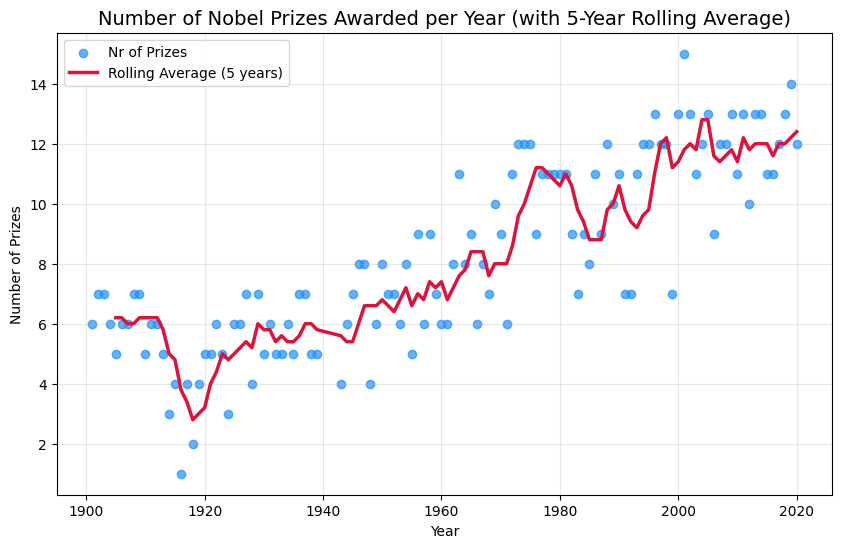

In [41]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))

# Scatter plot for yearly prizes
plt.scatter(
    prizes_per_year['year'], 
    prizes_per_year['count'], 
    color='dodgerblue', 
    label='Nr of Prizes', 
    alpha=0.7
)

# Line plot for rolling average
plt.plot(
    prizes_per_year['year'], 
    prizes_per_year['rolling_avg'], 
    color='crimson', 
    linewidth=2.5, 
    label='Rolling Average (5 years)'
)

# Add grid, labels, and title
plt.title('Number of Nobel Prizes Awarded per Year (with 5-Year Rolling Average)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


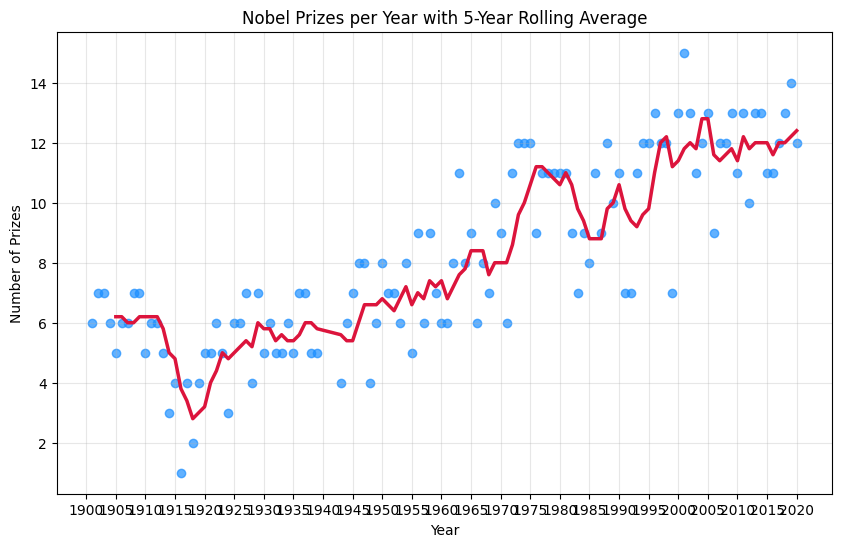

In [42]:
# Define ticks every 5 years from 1900 to 2020
plt.figure(figsize=(10,6))
plt.scatter(prizes_per_year['year'], prizes_per_year['count'], color='dodgerblue', alpha=0.7)
plt.plot(prizes_per_year['year'], prizes_per_year['rolling_avg'], color='crimson', linewidth=2.5)

plt.xticks(np.arange(1900, 2025, 5))  # Tick every 5 years
plt.title('Nobel Prizes per Year with 5-Year Rolling Average')
plt.xlabel('Year')
plt.ylabel('Number of Prizes')
plt.grid(alpha=0.3)
plt.show()


# Are More Prizes Shared Than Before?

**Challenge**: Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [43]:
# Calculate average prize share percentage per year
share_per_year = (
    df_data.groupby('year')['share_pct']
    .mean()
    .reset_index(name='avg_share_pct')
)

print("🏅 Average prize share per year:")
display(share_per_year.head())


🏅 Average prize share per year:


,year,avg_share_pct
0,1901,83.33
1,1902,71.43
2,1903,71.43
3,1904,83.33
4,1905,100.00


In [44]:
# Add a 5-year rolling average to smooth the data
share_per_year['rolling_avg'] = share_per_year['avg_share_pct'].rolling(window=5).mean()

print("📉 Added 5-year rolling average for prize sharing:")
display(share_per_year.tail(10))


📉 Added 5-year rolling average for prize sharing:


,year,avg_share_pct,rolling_avg
107,2011,46.15,49.37
108,2012,60.00,51.37
109,2013,46.15,50.60
110,2014,46.15,50.60
111,2015,54.55,50.60
112,2016,54.55,52.28
113,2017,50.00,50.28
114,2018,46.15,50.28
115,2019,42.86,49.62
116,2020,50.00,48.71


In [45]:
# Merge share and count datasets by year
combined_df = pd.merge(
    prizes_per_year[['year', 'count', 'rolling_avg']],
    share_per_year[['year', 'avg_share_pct', 'rolling_avg']],
    on='year',
    how='inner',
    suffixes=('_prizes', '_share')
)

print("📊 Combined dataset:")
display(combined_df.head())


📊 Combined dataset:


,year,count,rolling_avg_prizes,avg_share_pct,rolling_avg_share
0,1901,6,NaN,83.33,NaN
1,1902,7,NaN,71.43,NaN
2,1903,7,NaN,71.43,NaN
3,1904,6,NaN,83.33,NaN
4,1905,5,6.20,100.00,81.90


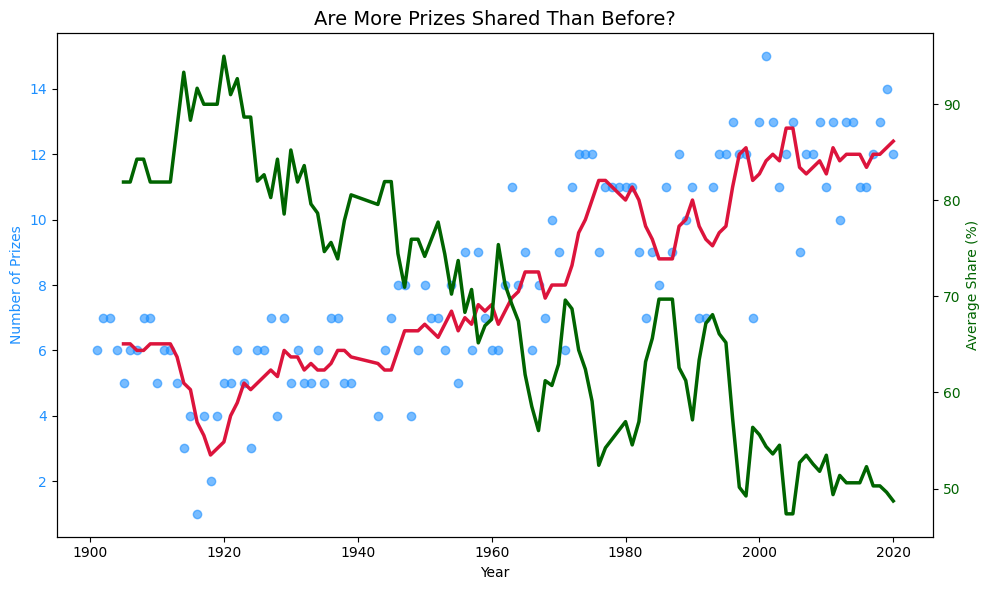

In [46]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10,6))

# Left axis → number of prizes
ax1.scatter(
    combined_df['year'], combined_df['count'],
    color='dodgerblue', alpha=0.6, label='Nr of Prizes'
)
ax1.plot(
    combined_df['year'], combined_df['rolling_avg_prizes'],
    color='crimson', linewidth=2.5, label='Rolling Avg (Prizes)'
)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Prizes', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')

# Right axis → average share
ax2 = ax1.twinx()
ax2.plot(
    combined_df['year'], combined_df['rolling_avg_share'],
    color='darkgreen', linewidth=2.5, label='Rolling Avg (Prize Share)'
)
ax2.set_ylabel('Average Share (%)', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

plt.title('Are More Prizes Shared Than Before?', fontsize=14)
fig.tight_layout()
plt.show()


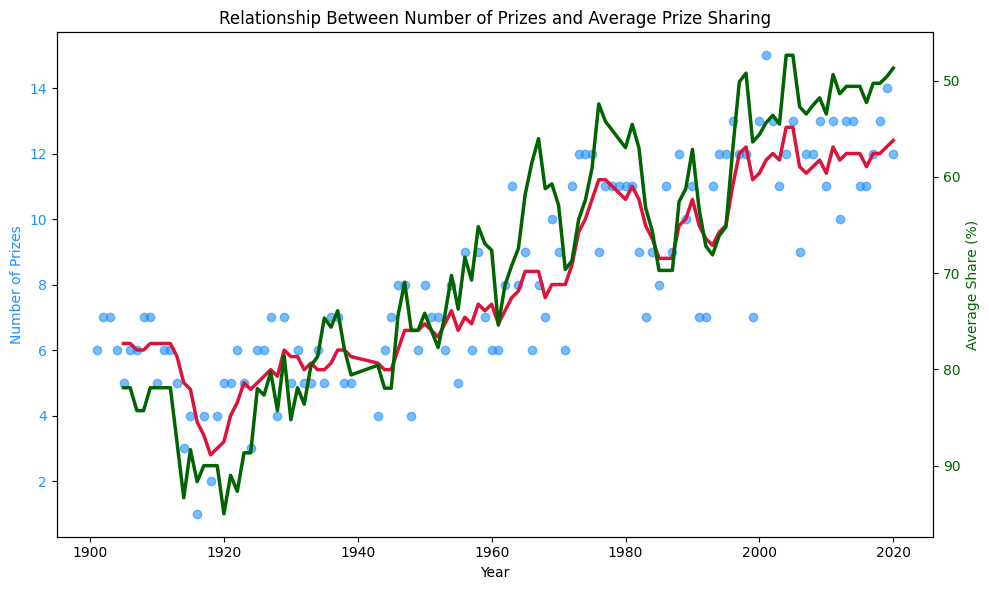

In [47]:
# Invert secondary y-axis to make the relationship more visible
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.scatter(combined_df['year'], combined_df['count'], color='dodgerblue', alpha=0.6)
ax1.plot(combined_df['year'], combined_df['rolling_avg_prizes'], color='crimson', linewidth=2.5)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Prizes', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')

ax2 = ax1.twinx()
ax2.plot(combined_df['year'], combined_df['rolling_avg_share'], color='darkgreen', linewidth=2.5)
ax2.set_ylabel('Average Share (%)', color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')
ax2.invert_yaxis()  # 🔄 invert y-axis

plt.title('Relationship Between Number of Prizes and Average Prize Sharing')
fig.tight_layout()
plt.show()


# The Countries with the Most Nobel Prizes

**Challenge**: 
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a horizontal bar chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [51]:
# Count Nobel Prizes by current birth country
top20_countries = (
    df_data.groupby('birth_country_current')
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
    .head(20)
)

print("🏅 Top 20 countries by number of Nobel Prizes:")
display(top20_countries)


🏅 Top 20 countries by number of Nobel Prizes:


,birth_country_current,count
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29
57,Poland,27
40,Japan,27
61,Russia,26
11,Canada,20
39,Italy,19


In [52]:
print("""
💬 Which column should we use?

- 'birth_country': can cause problems (countries that no longer exist, e.g. USSR, Czechoslovakia).
- 'organization_country': focuses on institutions rather than individuals.
✅ 'birth_country_current': best overall choice — standardized modern country names.
""")



💬 Which column should we use?

- 'birth_country': can cause problems (countries that no longer exist, e.g. USSR, Czechoslovakia).
- 'organization_country': focuses on institutions rather than individuals.
✅ 'birth_country_current': best overall choice — standardized modern country names.



In [53]:
import plotly.express as px

fig = px.bar(
    top20_countries.sort_values(by='count', ascending=True),
    x='count',
    y='birth_country_current',
    orientation='h',
    title='Top 20 Countries by Number of Nobel Prizes',
    color='count',
    color_continuous_scale='Aggrnyl'
)

fig.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    template='plotly_white'
)

fig.show()


In [54]:
print("🌟 Top 5 Nobel Prize Winning Countries:")
display(top20_countries.head(5))


🌟 Top 5 Nobel Prize Winning Countries:


,birth_country_current,count
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29


In [55]:
print("""
🧠 Insights:
- The USA typically dominates, followed by the UK, Germany, and France.
- These countries have had strong scientific institutions and funding.
- Smaller countries like Switzerland and Sweden rank surprisingly high given population size.
""")



🧠 Insights:
- The USA typically dominates, followed by the UK, Germany, and France.
- These countries have had strong scientific institutions and funding.
- Smaller countries like Switzerland and Sweden rank surprisingly high given population size.



# Use a Choropleth Map to Show the Number of Prizes Won by Country

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 


In [56]:
# Group by country and count prizes, keeping the ISO code
map_df = (
    df_data.groupby(['birth_country_current', 'ISO'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False)
)

print("🌍 Prizes by country (with ISO codes):")
display(map_df.head())


🌍 Prizes by country (with ISO codes):


,birth_country_current,ISO,count
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29


In [57]:
import plotly.express as px

fig = px.choropleth(
    map_df,
    locations='ISO',                   # 3-letter ISO codes
    color='count',                     # Number of prizes
    hover_name='birth_country_current',
    color_continuous_scale='matter',   # Beautiful sequential colormap
    title='Number of Nobel Prizes by Country',
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='natural earth'),
    template='plotly_white'
)

fig.show()


In [58]:
# Try other interesting Plotly colorscales
color_scales = ['Viridis', 'Aggrnyl', 'YlOrRd', 'Cividis', 'matter']

for scale in color_scales:
    print(f"🎨 Testing colorscale: {scale}")
    fig = px.choropleth(
        map_df,
        locations='ISO',
        color='count',
        hover_name='birth_country_current',
        color_continuous_scale=scale,
        title=f'Nobel Prizes by Country — {scale} scale'
    )
    fig.show()


🎨 Testing colorscale: Viridis


🎨 Testing colorscale: Aggrnyl


🎨 Testing colorscale: YlOrRd


🎨 Testing colorscale: Cividis


🎨 Testing colorscale: matter


In [59]:
top10_map = map_df.head(10)
print("🏆 Top 10 Countries with Most Nobel Prizes:")
display(top10_map)


🏆 Top 10 Countries with Most Nobel Prizes:


,birth_country_current,ISO,count
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29
57,Poland,POL,27
40,Japan,JPN,27
61,Russia,RUS,26
11,Canada,CAN,20
39,Italy,ITA,19


In [60]:
print("""
🧠 Insights:
- The map highlights strong clusters in North America and Western Europe.
- The United States, United Kingdom, and Germany dominate Nobel Prizes.
- Scandinavian countries (especially Sweden and Norway) stand out despite smaller populations.
- Other regions, like Asia and Africa, are gradually increasing in recognition over time.
""")



🧠 Insights:
- The map highlights strong clusters in North America and Western Europe.
- The United States, United Kingdom, and Germany dominate Nobel Prizes.
- Scandinavian countries (especially Sweden and Norway) stand out despite smaller populations.
- Other regions, like Asia and Africa, are gradually increasing in recognition over time.



# In Which Categories are the Different Countries Winning Prizes? 

**Challenge**: See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>


In [61]:
# Group by birth_country_current and category
country_category_df = (
    df_data.groupby(['birth_country_current', 'category'])
    .size()
    .reset_index(name='count')
)

print("📊 Number of Nobel Prizes by Country and Category:")
display(country_category_df.head(10))


📊 Number of Nobel Prizes by Country and Category:


,birth_country_current,category,count
0,Algeria,Literature,1
1,Algeria,Physics,1
2,Argentina,Medicine,2
3,Argentina,Peace,2
4,Australia,Chemistry,1
5,Australia,Medicine,7
6,Australia,Physics,2
7,Austria,Chemistry,5
8,Austria,Economics,1
9,Austria,Literature,2


In [62]:
# Calculate total prizes per country (for top countries only)
country_totals = (
    df_data.groupby('birth_country_current')
    .size()
    .reset_index(name='total_prizes')
    .sort_values(by='total_prizes', ascending=False)
)

# Select the top 10–15 countries
top_countries = country_totals.head(10)['birth_country_current']
print("🏆 Top 10 Countries by Nobel Prize Count:")
display(top_countries)


🏆 Top 10 Countries by Nobel Prize Count:


74    United States of America
73              United Kingdom
26                     Germany
25                      France
67                      Sweden
57                      Poland
40                       Japan
61                      Russia
11                      Canada
39                       Italy
Name: birth_country_current, dtype: object

In [63]:
# Filter the grouped data for only the top countries
country_category_top = country_category_df[
    country_category_df['birth_country_current'].isin(top_countries)
]

print("🎯 Filtered dataset for visualization:")
display(country_category_top.head(10))


🎯 Filtered dataset for visualization:


,birth_country_current,category,count
27,Canada,Chemistry,4
28,Canada,Economics,3
29,Canada,Literature,2
30,Canada,Medicine,4
31,Canada,Peace,1
32,Canada,Physics,6
65,France,Chemistry,10
66,France,Economics,4
67,France,Literature,11
68,France,Medicine,12


In [64]:
import plotly.express as px

fig = px.bar(
    country_category_top,
    x='birth_country_current',
    y='count',
    color='category',
    title='Nobel Prizes by Country and Category',
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Number of Prizes',
    legend_title='Category',
    template='plotly_white',
    barmode='stack'
)

fig.show()


In [65]:
# Quick lookups to compare specific countries and categories
def get_prizes(country, category):
    return country_category_df.query(
        "birth_country_current == @country and category == @category"
    )['count'].sum()

# Example comparisons:
print("🇩🇪 Germany vs 🇺🇸 USA — Weakest categories:")
for cat in df_data['category'].unique():
    print(f"{cat}: Germany = {get_prizes('Germany', cat)}, USA = {get_prizes('United States of America', cat)}")

print("\n📊 Germany vs UK — In which category does Germany lead?")
for cat in df_data['category'].unique():
    if get_prizes('Germany', cat) > get_prizes('United Kingdom', cat):
        print(f"✅ Germany leads in: {cat}")


🇩🇪 Germany vs 🇺🇸 USA — Weakest categories:
Chemistry: Germany = 26, USA = 55
Literature: Germany = 8, USA = 10
Medicine: Germany = 18, USA = 78
Peace: Germany = 5, USA = 19
Physics: Germany = 26, USA = 70
Economics: Germany = 1, USA = 49

📊 Germany vs UK — In which category does Germany lead?
✅ Germany leads in: Literature
✅ Germany leads in: Physics


In [66]:
print("""
🧠 Insights:
- 🇩🇪 Germany and 🇯🇵 Japan tend to be weaker in the Peace and Literature categories compared to the 🇺🇸 USA.
- 🇩🇪 Germany often leads the 🇬🇧 UK in Chemistry.
- 🇫🇷 France typically has more Literature prizes than 🇩🇪 Germany.
- 🇦🇺 Australia’s prizes are dominated by Medicine.
- 🇳🇱 The Netherlands has roughly half its prizes in Physics.
- 🇺🇸 The USA alone has more prizes in Economics than all of 🇫🇷 France — and dominates in Physics and Medicine.
""")



🧠 Insights:
- 🇩🇪 Germany and 🇯🇵 Japan tend to be weaker in the Peace and Literature categories compared to the 🇺🇸 USA.
- 🇩🇪 Germany often leads the 🇬🇧 UK in Chemistry.
- 🇫🇷 France typically has more Literature prizes than 🇩🇪 Germany.
- 🇦🇺 Australia’s prizes are dominated by Medicine.
- 🇳🇱 The Netherlands has roughly half its prizes in Physics.
- 🇺🇸 The USA alone has more prizes in Economics than all of 🇫🇷 France — and dominates in Physics and Medicine.



### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [67]:
# Group by country and year
country_year_df = (
    df_data.groupby(['birth_country_current', 'year'])
    .size()
    .reset_index(name='count')
    .sort_values(by=['birth_country_current', 'year'])
)

print("📊 Number of Nobel Prizes by Country and Year:")
display(country_year_df.head(10))


📊 Number of Nobel Prizes by Country and Year:


,birth_country_current,year,count
0,Algeria,1957,1
1,Algeria,1997,1
2,Argentina,1936,1
3,Argentina,1947,1
4,Argentina,1980,1
5,Argentina,1984,1
6,Australia,1915,1
7,Australia,1945,1
8,Australia,1960,1
9,Australia,1963,1


In [68]:
# Calculate cumulative prizes per country over time
country_year_df['cumulative_prizes'] = (
    country_year_df.groupby('birth_country_current')['count']
    .cumsum()
)

print("🔁 Cumulative totals calculated:")
display(country_year_df.head(10))


🔁 Cumulative totals calculated:


,birth_country_current,year,count,cumulative_prizes
0,Algeria,1957,1,1
1,Algeria,1997,1,2
2,Argentina,1936,1,1
3,Argentina,1947,1,2
4,Argentina,1980,1,3
5,Argentina,1984,1,4
6,Australia,1915,1,1
7,Australia,1945,1,2
8,Australia,1960,1,3
9,Australia,1963,1,4


In [69]:
# Identify the top 10 countries by total prizes
top_countries = (
    df_data['birth_country_current']
    .value_counts()
    .head(10)
    .index
)

# Filter data to only include these top countries
country_year_top = country_year_df[
    country_year_df['birth_country_current'].isin(top_countries)
]

print("🏆 Top 10 countries included in the plot:")
display(top_countries)


🏆 Top 10 countries included in the plot:


Index(['United States of America', 'United Kingdom', 'Germany', 'France',
       'Sweden', 'Japan', 'Poland', 'Russia', 'Canada', 'Italy'],
      dtype='object', name='birth_country_current')

In [70]:
import plotly.express as px

fig = px.line(
    country_year_top,
    x='year',
    y='cumulative_prizes',
    color='birth_country_current',
    title='Cumulative Number of Nobel Prizes by Country Over Time',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Cumulative Number of Prizes',
    template='plotly_white'
)

fig.show()


In [71]:
# Find the year when the U.S. cumulative total first exceeded all others
usa_data = country_year_top[country_year_top['birth_country_current'] == 'United States of America']
leaders = []

for year in usa_data['year']:
    year_data = country_year_top[country_year_top['year'] == year]
    leader = year_data.sort_values(by='cumulative_prizes', ascending=False).head(1)
    leaders.append((year, leader.iloc[0]['birth_country_current']))

# Find when USA became the leader
for y, c in leaders:
    if c == 'United States of America':
        print(f"🇺🇸 The United States became the leading country in Nobel Prizes around {y}.")
        break


🇺🇸 The United States became the leading country in Nobel Prizes around 1938.


In [72]:
print("""
🧠 Insights:
- Before 1950, European countries — particularly the UK, Germany, and France — dominated Nobel Prizes.
- After World War II, the United States experienced a massive surge in scientific and economic influence, 
  becoming the clear global leader by the late 1950s.
- Germany's dominance pre-WWII and Sweden’s consistent output highlight strong academic traditions.
- The steep rise of the U.S. reflects post-war investment in education, research, and technology.
""")



🧠 Insights:
- Before 1950, European countries — particularly the UK, Germany, and France — dominated Nobel Prizes.
- After World War II, the United States experienced a massive surge in scientific and economic influence, 
  becoming the clear global leader by the late 1950s.
- Germany's dominance pre-WWII and Sweden’s consistent output highlight strong academic traditions.
- The steep rise of the U.S. reflects post-war investment in education, research, and technology.



# What are the Top Research Organisations?

**Challenge**: Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [80]:
# Drop missing organisation names
df_orgs = df_data.dropna(subset=['organization_name']).copy()

# Clean whitespace
df_orgs['organization_name'] = df_orgs['organization_name'].str.strip()

# Count number of laureates per organisation
org_counts = (
    df_orgs['organization_name']
    .value_counts()
    .reset_index()
)

# ✅ Rename columns properly (fixes duplicate 'count' issue)
org_counts.columns = ['organization_name', 'nobel_count']

# Keep only the top 20
org_counts = org_counts.head(20)

print("✅ Columns in org_counts:", org_counts.columns.tolist())
display(org_counts.head())


✅ Columns in org_counts: ['organization_name', 'nobel_count']


,organization_name,nobel_count
0,University of California,40
1,Harvard University,29
2,Stanford University,23
3,Massachusetts Institute of Technology (MIT),21
4,University of Chicago,20


In [81]:
import plotly.express as px

fig = px.bar(
    org_counts.sort_values('nobel_count', ascending=True),
    x='nobel_count',
    y='organization_name',
    orientation='h',
    title='Top 20 Research Organisations Affiliated with Nobel Laureates',
    color='nobel_count',
    color_continuous_scale='Aggrnyl'
)

fig.update_layout(
    xaxis_title='Number of Nobel Laureates',
    yaxis_title='Organisation',
    template='plotly_white'
)

fig.show()


In [82]:
def count_affiliations(keyword):
    return df_orgs['organization_name'].str.contains(keyword, case=False, na=False).sum()

print(f"🎓 Harvard University: {count_affiliations('Harvard')} laureates")
print(f"🏛️ University of Chicago: {count_affiliations('Chicago')} laureates")


🎓 Harvard University: 36 laureates
🏛️ University of Chicago: 20 laureates


# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

**Challenge**: 
* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [85]:
# Drop missing cities
df_cities = df_data.dropna(subset=['organization_city']).copy()

# Clean whitespace
df_cities['organization_city'] = df_cities['organization_city'].str.strip()

# Count Nobel prizes by city
city_counts = (
    df_cities['organization_city']
    .value_counts()
    .reset_index()
)

# Rename columns clearly
city_counts.columns = ['organization_city', 'nobel_count']

# Keep top 20
city_counts = city_counts.head(20)

print("✅ Columns in city_counts:", city_counts.columns.tolist())
display(city_counts.head())


✅ Columns in city_counts: ['organization_city', 'nobel_count']


,organization_city,nobel_count
0,"Cambridge, MA",50
1,"New York, NY",45
2,Cambridge,31
3,London,27
4,Paris,25


In [86]:
import plotly.express as px

fig = px.bar(
    city_counts.sort_values('nobel_count', ascending=True),
    x='nobel_count',
    y='organization_city',
    orientation='h',
    title='Top 20 Cities Hosting Nobel Prize-Winning Institutions',
    color='nobel_count',
    color_continuous_scale='Aggrnyl'
)

fig.update_layout(
    xaxis_title='Number of Nobel Laureates',
    yaxis_title='City',
    template='plotly_white'
)

fig.show()


# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 

**Challenge**: 
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [88]:
# Drop missing birth cities
df_birth_cities = df_data.dropna(subset=['birth_city']).copy()
df_birth_cities['birth_city'] = df_birth_cities['birth_city'].str.strip()

# Count Nobel laureates by birth city
birth_city_counts = (
    df_birth_cities['birth_city']
    .value_counts()
    .reset_index()
)

# Rename columns clearly
birth_city_counts.columns = ['birth_city', 'nobel_count']

# Top 20 birth cities
birth_city_counts = birth_city_counts.head(20)

print("🏙️ Top 20 Birth Cities of Nobel Laureates:")
display(birth_city_counts.head())

# Plotly bar chart using 'Plasma' color scale
import plotly.express as px

fig = px.bar(
    birth_city_counts.sort_values('nobel_count', ascending=True),
    x='nobel_count',
    y='birth_city',
    orientation='h',
    title='Top 20 Birth Cities of Nobel Laureates',
    color='nobel_count',
    color_continuous_scale='Plasma'
)

fig.update_layout(
    xaxis_title='Number of Nobel Laureates',
    yaxis_title='Birth City',
    template='plotly_white'
)

fig.show()


🏙️ Top 20 Birth Cities of Nobel Laureates:


,birth_city,nobel_count
0,"New York, NY",53
1,Paris,26
2,London,19
3,Vienna,14
4,"Chicago, IL",12


In [89]:
# Helper: total USA-born laureates
usa_total = df_data[df_data['birth_country_current'] == 'United States of America'].shape[0]

# Count laureates by city name
def born_in(city):
    return df_birth_cities['birth_city'].str.contains(city, case=False, na=False).sum()

# Calculate numbers
nyc_count = born_in('New York')
london_count = born_in('London')
paris_count = born_in('Paris')
vienna_count = born_in('Vienna')

# Percentage of US Nobel Prizes from laureates born in New York
nyc_percentage = (nyc_count / usa_total) * 100 if usa_total > 0 else 0

# Count how many of top 5 are in the USA
top5 = birth_city_counts.head(5)
usa_top5_count = df_birth_cities[
    df_birth_cities['birth_city'].isin(top5['birth_city'])
]['birth_country_current'].eq('United States of America').sum()

print(f"🗽 Nobel laureates born in New York: {nyc_count} ({nyc_percentage:.2f}% of US laureates)")
print(f"🇬🇧 London-born laureates: {london_count}")
print(f"🇫🇷 Paris-born laureates: {paris_count}")
print(f"🇦🇹 Vienna-born laureates: {vienna_count}")
print(f"🇺🇸 Out of the top 5 birth cities, {usa_top5_count} are in the United States.")


🗽 Nobel laureates born in New York: 53 (18.86% of US laureates)
🇬🇧 London-born laureates: 20
🇫🇷 Paris-born laureates: 26
🇦🇹 Vienna-born laureates: 14
🇺🇸 Out of the top 5 birth cities, 65 are in the United States.


# Plotly Sunburst Chart: Combine Country, City, and Organisation

**Challenge**: 

* Create a DataFrame that groups the number of prizes by organisation. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, what do you notice about Germany and France? 


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>



In [90]:
# Drop missing values in key columns
df_sun = df_data.dropna(subset=['organization_country', 'organization_city', 'organization_name']).copy()

# Group and count number of prizes per (Country, City, Organisation)
sunburst_df = (
    df_sun.groupby(['organization_country', 'organization_city', 'organization_name'])
    .size()
    .reset_index(name='nobel_count')
)

print("🏛️ Nobel Prize Affiliations by Country, City, and Organisation:")
display(sunburst_df.head())


🏛️ Nobel Prize Affiliations by Country, City, and Organisation:


,organization_country,organization_city,organization_name,nobel_count
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1


In [91]:
import plotly.express as px

fig = px.sunburst(
    sunburst_df,
    path=['organization_country', 'organization_city', 'organization_name'],  # hierarchy
    values='nobel_count',          # size of each slice
    color='organization_country',  # color by country
    title='Nobel Prize Affiliations by Country, City, and Organisation',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    template='plotly_white',
    margin=dict(t=60, l=0, r=0, b=0)
)

fig.show()


In [92]:
print("""
🧠 Insights:
- 🇩🇪 **Germany** shows multiple strong research hubs — particularly Berlin and Munich, 
  with major contributions from Max Planck Institutes and Humboldt University.
- 🇫🇷 **France** is more centralized — most Nobel-winning institutions are located in Paris, 
  such as the University of Paris and Collège de France.
- 🇺🇸 The United States has a broader spread, with key clusters in Cambridge (Harvard, MIT),
  Chicago, and California (Stanford, Caltech, UC Berkeley).
- The chart highlights how scientific excellence often clusters around a few powerful research ecosystems.
""")



🧠 Insights:
- 🇩🇪 **Germany** shows multiple strong research hubs — particularly Berlin and Munich, 
  with major contributions from Max Planck Institutes and Humboldt University.
- 🇫🇷 **France** is more centralized — most Nobel-winning institutions are located in Paris, 
  such as the University of Paris and Collège de France.
- 🇺🇸 The United States has a broader spread, with key clusters in Cambridge (Harvard, MIT),
  Chicago, and California (Stanford, Caltech, UC Berkeley).
- The chart highlights how scientific excellence often clusters around a few powerful research ecosystems.



# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [93]:
import pandas as pd

# Ensure birth_date is a datetime
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'], errors='coerce')

# Convert year to datetime (e.g. January 1st of the award year)
df_data['award_year_date'] = pd.to_datetime(df_data['year'], format='%Y', errors='coerce')

print("✅ Converted 'birth_date' and 'year' to datetime successfully.")
display(df_data[['full_name', 'birth_date', 'year', 'award_year_date']].head())


✅ Converted 'birth_date' and 'year' to datetime successfully.


,full_name,birth_date,year,award_year_date
0,Jacobus Henricus van 't Hoff,1852-08-30,1901,1901-01-01
1,Sully Prudhomme,1839-03-16,1901,1901-01-01
2,Emil Adolf von Behring,1854-03-15,1901,1901-01-01
3,Frédéric Passy,1822-05-20,1901,1901-01-01
4,Jean Henry Dunant,1828-05-08,1901,1901-01-01


In [94]:
# Calculate difference in years between award year and birth date
df_data['winning_age'] = (df_data['award_year_date'] - df_data['birth_date']).dt.days / 365.25

print("🎂 Added 'winning_age' column to DataFrame:")
display(df_data[['full_name', 'year', 'winning_age']].head(10))


🎂 Added 'winning_age' column to DataFrame:


,full_name,year,winning_age
0,Jacobus Henricus van 't Hoff,1901,48.34
1,Sully Prudhomme,1901,61.80
2,Emil Adolf von Behring,1901,46.80
3,Frédéric Passy,1901,78.62
4,Jean Henry Dunant,1901,72.65
5,Wilhelm Conrad Röntgen,1901,55.76
6,Hermann Emil Fischer,1902,49.23
7,Christian Matthias Theodor Mommsen,1902,84.08
8,Ronald Ross,1902,44.64
9,Charles Albert Gobat,1902,58.61


In [95]:
print("📊 Summary Statistics for Laureate Age at Winning:")
print(df_data['winning_age'].describe())

# Quick sanity check — youngest and oldest winners
youngest = df_data.loc[df_data['winning_age'].idxmin(), ['full_name', 'category', 'winning_age']]
oldest = df_data.loc[df_data['winning_age'].idxmax(), ['full_name', 'category', 'winning_age']]

print(f"\n🧒 Youngest laureate: {youngest['full_name']} ({youngest['category']}) — {youngest['winning_age']:.1f} years old")
print(f"👴 Oldest laureate: {oldest['full_name']} ({oldest['category']}) — {oldest['winning_age']:.1f} years old")


📊 Summary Statistics for Laureate Age at Winning:
count   934.00
mean     59.44
std      12.61
min      16.47
25%      50.11
50%      59.76
75%      68.56
max      96.44
Name: winning_age, dtype: float64

🧒 Youngest laureate: Malala Yousafzai (Peace) — 16.5 years old
👴 Oldest laureate: John Goodenough (Chemistry) — 96.4 years old


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [96]:
import numpy as np

# Drop any rows without age data
df_age = df_data.dropna(subset=['winning_age']).copy()

# Identify youngest and oldest laureates
youngest = df_age.loc[df_age['winning_age'].idxmin()]
oldest = df_age.loc[df_age['winning_age'].idxmax()]

# Calculate statistics
avg_age = df_age['winning_age'].mean()
age_75th = np.percentile(df_age['winning_age'], 75)

print(f"🧒 Youngest laureate: {youngest['full_name']} ({youngest['category']}) - {youngest['winning_age']:.1f} years old")
print(f"👴 Oldest laureate: {oldest['full_name']} ({oldest['category']}) - {oldest['winning_age']:.1f} years old")
print(f"📊 Average age of Nobel Prize winners: {avg_age:.1f} years")
print(f"🎯 75% of laureates are younger than {age_75th:.1f} years old when receiving the prize")


🧒 Youngest laureate: Malala Yousafzai (Peace) - 16.5 years old
👴 Oldest laureate: John Goodenough (Chemistry) - 96.4 years old
📊 Average age of Nobel Prize winners: 59.4 years
🎯 75% of laureates are younger than 68.6 years old when receiving the prize


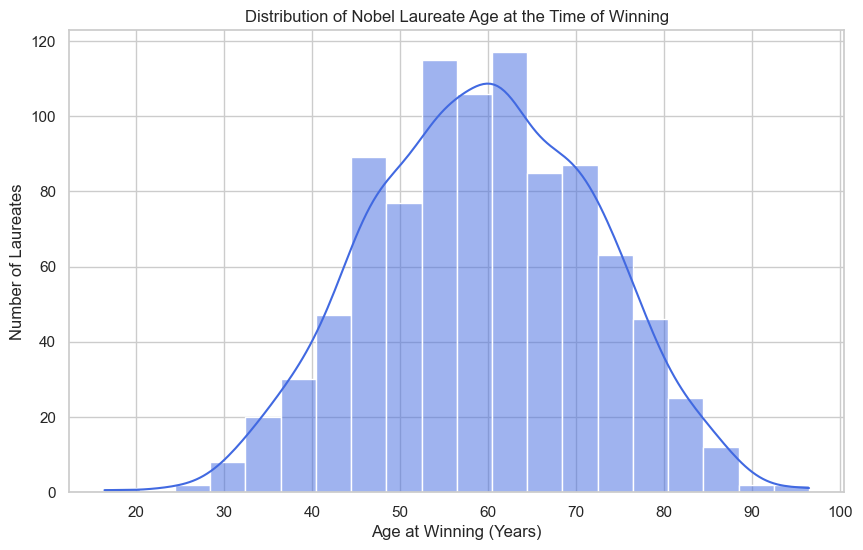

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_age['winning_age'], bins=20, kde=True, color='royalblue')

plt.title('Distribution of Nobel Laureate Age at the Time of Winning')
plt.xlabel('Age at Winning (Years)')
plt.ylabel('Number of Laureates')

plt.show()


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [98]:
# Drop missing values for accurate statistics
df_age = df_data.dropna(subset=['winning_age']).copy()

# Descriptive statistics for laureate ages
stats = df_age['winning_age'].describe()

print("📊 Descriptive Statistics for Nobel Laureate Age at Time of Award:\n")
print(stats)


📊 Descriptive Statistics for Nobel Laureate Age at Time of Award:

count   934.00
mean     59.44
std      12.61
min      16.47
25%      50.11
50%      59.76
75%      68.56
max      96.44
Name: winning_age, dtype: float64


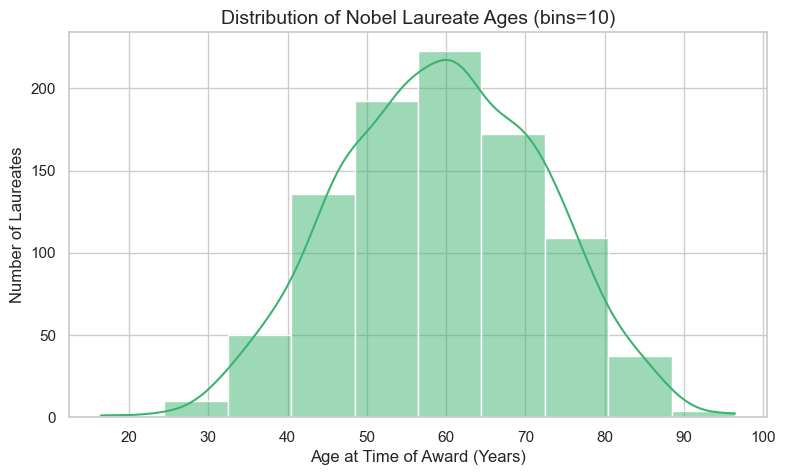

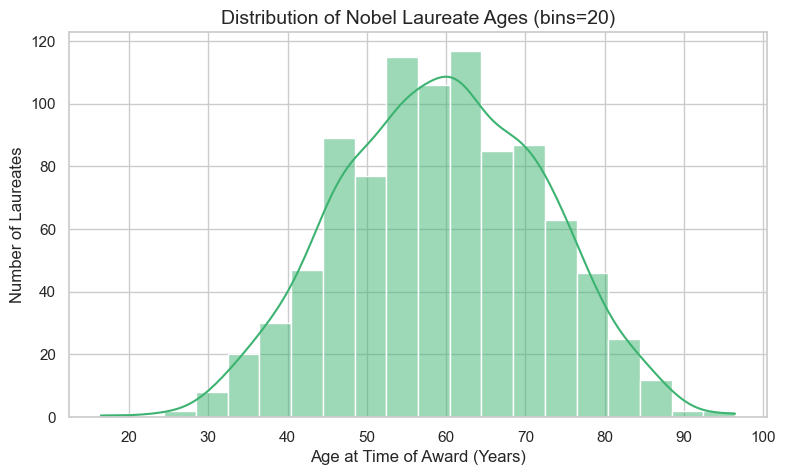

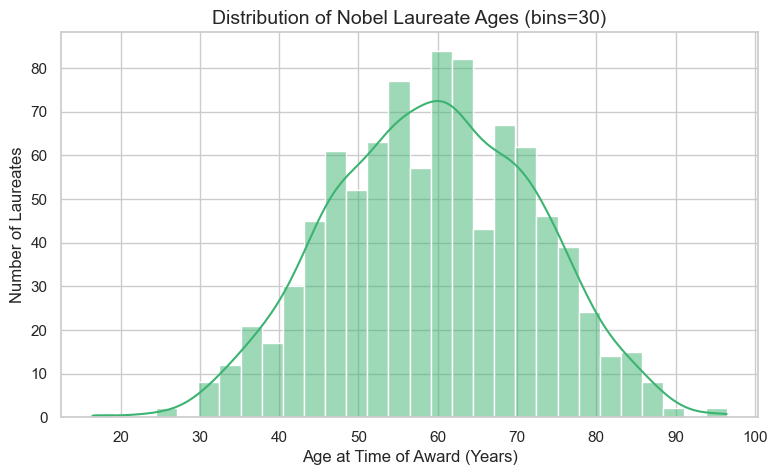

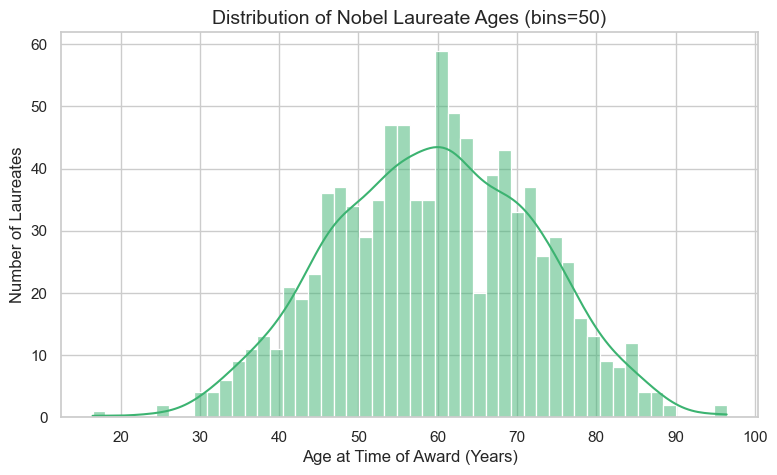

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Test multiple bin sizes to see how distribution changes
for bins in [10, 20, 30, 50]:
    plt.figure(figsize=(9, 5))
    sns.histplot(df_age['winning_age'], bins=bins, kde=True, color='mediumseagreen')
    plt.title(f'Distribution of Nobel Laureate Ages (bins={bins})', fontsize=14)
    plt.xlabel('Age at Time of Award (Years)')
    plt.ylabel('Number of Laureates')
    plt.show()


### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


In [100]:
import pandas as pd

# Drop rows without valid age or year values
df_age_trend = df_data.dropna(subset=['winning_age', 'year']).copy()

# Basic check of the relevant columns
print("✅ Data prepared for regression analysis.")
print(df_age_trend[['year', 'winning_age']].head())


✅ Data prepared for regression analysis.
   year  winning_age
0  1901        48.34
1  1901        61.80
2  1901        46.80
3  1901        78.62
4  1901        72.65


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

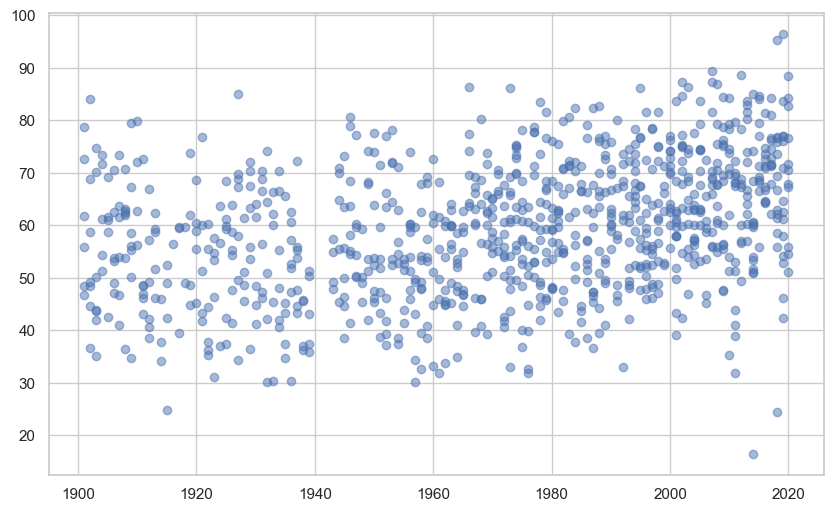

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Regression plot with Lowess (Locally Weighted Scatterplot Smoothing)
sns.regplot(
    data=df_age_trend,
    x='year',
    y='winning_age',
    lowess=True,
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)

plt.title("Age of Nobel Laureates at the Time of Award (1900–2020)", fontsize=14)
plt.xlabel("Award Year")
plt.ylabel("Age at Time of Award (Years)")
plt.show()


### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

In [102]:
# Drop missing values for clean plotting
df_age_cat = df_data.dropna(subset=['winning_age', 'category']).copy()

# Quick summary check
print("✅ Data prepared for category age comparison.")
print(df_age_cat[['category', 'winning_age']].groupby('category').mean().sort_values('winning_age'))


✅ Data prepared for category age comparison.
            winning_age
category               
Physics           55.94
Medicine          58.07
Chemistry         58.31
Peace             60.39
Literature        64.28
Economics         66.46


C:\Users\angel\AppData\Local\Temp\ipykernel_30260\3078678604.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




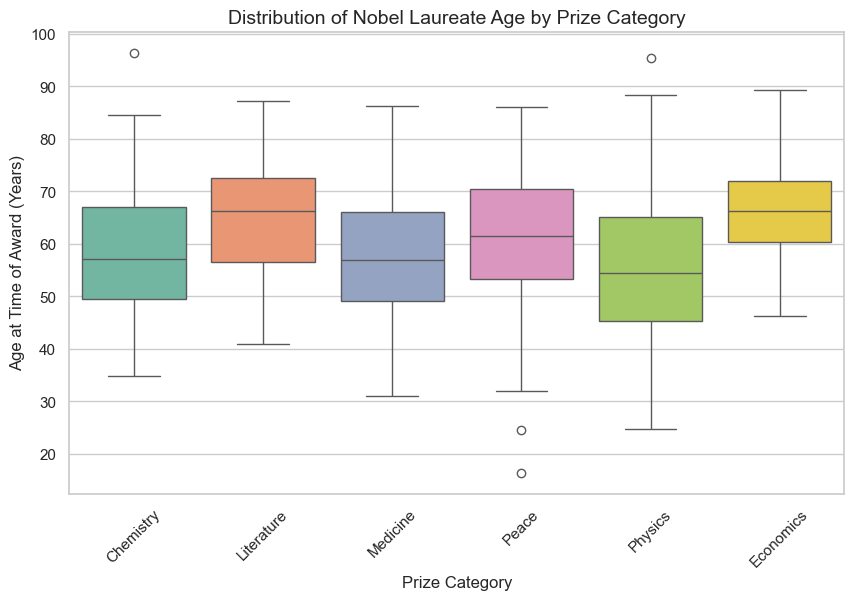

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style and figure
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(
    data=df_age_cat,
    x='category',
    y='winning_age',
    palette='Set2'
)

# Improve readability
plt.title("Distribution of Nobel Laureate Age by Prize Category", fontsize=14)
plt.xlabel("Prize Category")
plt.ylabel("Age at Time of Award (Years)")
plt.xticks(rotation=45)
plt.show()


**Challenge**
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


In [3]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

# Load your Nobel dataset (adjust the filename if different)
df_data = pd.read_csv("nobel_prize_data.csv")

# Quick check
print("✅ Loaded Nobel data with columns:")
print(df_data.columns.tolist()[:10], "...")  # show first few columns
print("Total rows:", len(df_data))


✅ Loaded Nobel data with columns:
['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_type', 'full_name', 'birth_date', 'birth_city', 'birth_country'] ...
Total rows: 962


In [7]:
# Convert 'birth_date' to datetime safely
df_data['birth_date'] = pd.to_datetime(df_data['birth_date'], errors='coerce')

# Compute age at award
df_data['winning_age'] = df_data['year'] - df_data['birth_date'].dt.year

# Check result
print(df_data[['full_name', 'year', 'birth_date', 'winning_age']].head())


                      full_name  year birth_date  winning_age
0  Jacobus Henricus van 't Hoff  1901 1852-08-30         49.0
1               Sully Prudhomme  1901 1839-03-16         62.0
2        Emil Adolf von Behring  1901 1854-03-15         47.0
3                Frédéric Passy  1901 1822-05-20         79.0
4             Jean Henry Dunant  1901 1828-05-08         73.0


In [8]:
# Drop missing values and prepare subset
df_age_lm = df_data.dropna(subset=['winning_age', 'year', 'category']).copy()

print("✅ Data ready for regression plots.")
print(df_age_lm[['year', 'winning_age', 'category']].head())


✅ Data ready for regression plots.
   year  winning_age    category
0  1901         49.0   Chemistry
1  1901         62.0  Literature
2  1901         47.0    Medicine
3  1901         79.0       Peace
4  1901         73.0       Peace


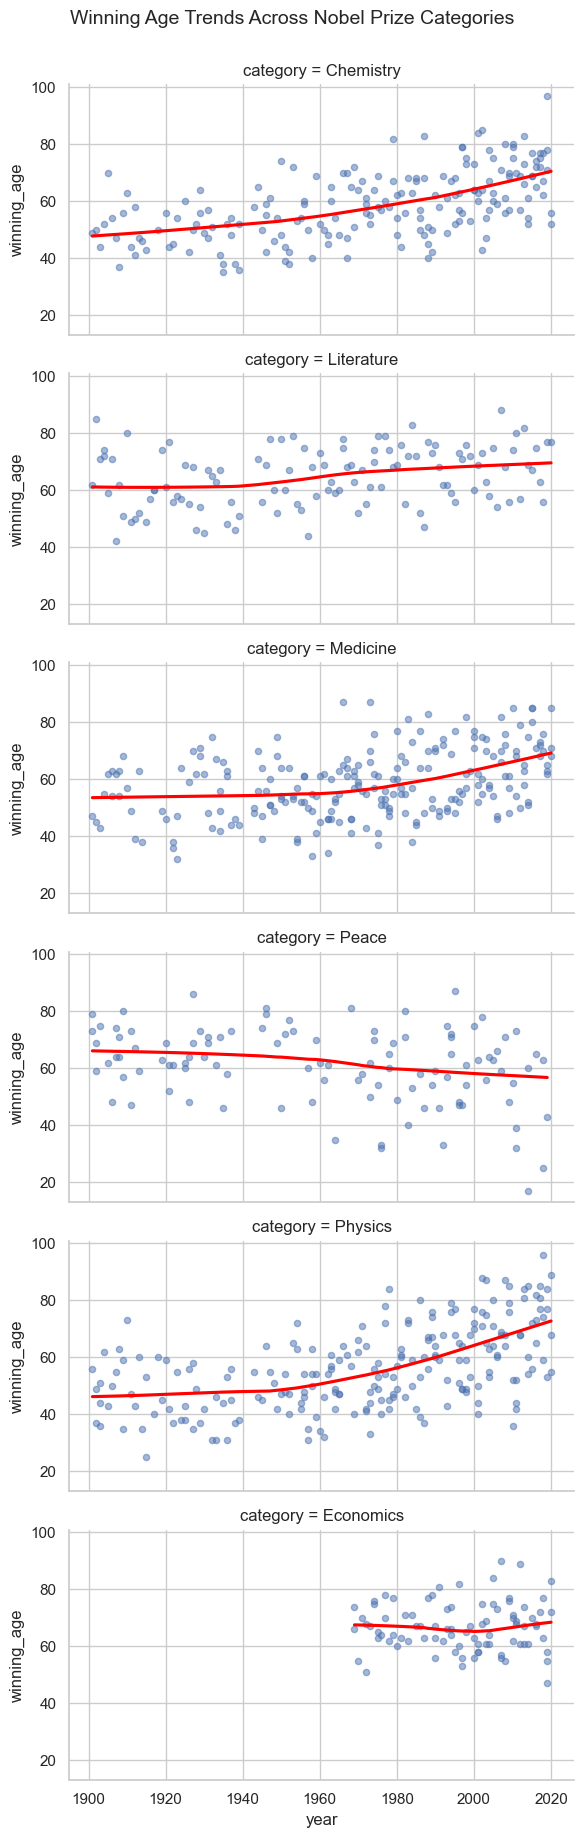

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

sns.lmplot(
    data=df_age_lm,
    x='year',
    y='winning_age',
    row='category',
    lowess=True,
    aspect=2,
    height=3,
    scatter_kws={'alpha': 0.5, 's': 20},
    line_kws={'color': 'red'}
)

plt.suptitle("Winning Age Trends Across Nobel Prize Categories", y=1.02, fontsize=14)
plt.show()


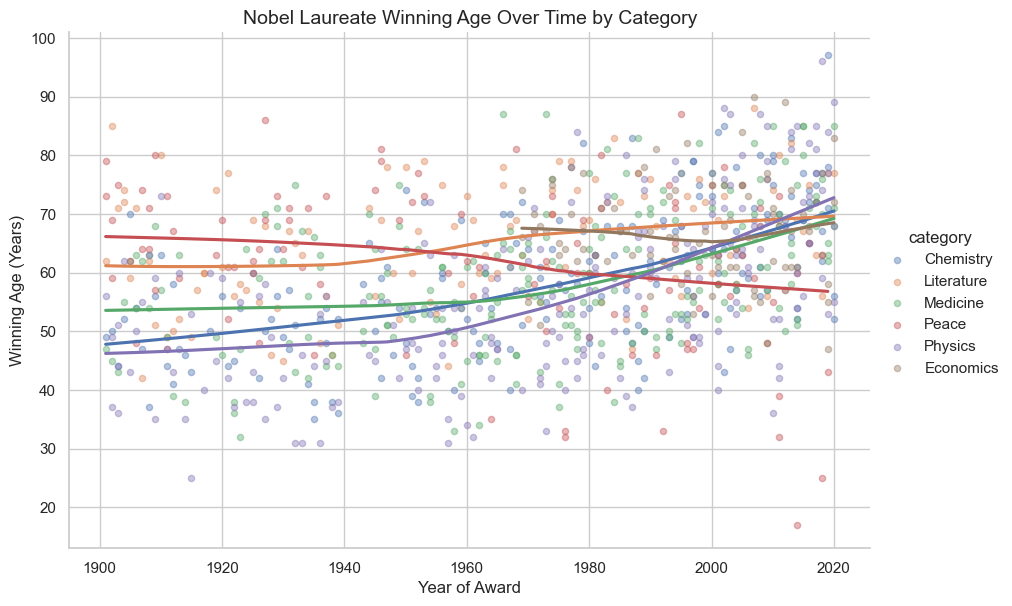

In [10]:
sns.lmplot(
    data=df_age_lm,
    x='year',
    y='winning_age',
    hue='category',
    lowess=True,
    height=6,
    aspect=1.5,
    scatter_kws={'alpha': 0.4, 's': 20}
)

plt.title("Nobel Laureate Winning Age Over Time by Category", fontsize=14)
plt.xlabel("Year of Award")
plt.ylabel("Winning Age (Years)")
plt.show()


In [11]:
print("""
📊 Nobel Prize Winning Age Trends — Insights

• Physics, Chemistry, Medicine → Average age increasing over time.
• Peace → Slight decline; younger winners more common lately.
• Literature → Wide variability, slightly younger in modern times.
• Economics → Noticeably higher ages; trend upward since 1970s.

🔍 Overall: Nobel recognition often comes later in life now, especially
in research-heavy fields where discoveries take decades to mature.
""")



📊 Nobel Prize Winning Age Trends — Insights

• Physics, Chemistry, Medicine → Average age increasing over time.
• Peace → Slight decline; younger winners more common lately.
• Literature → Wide variability, slightly younger in modern times.
• Economics → Noticeably higher ages; trend upward since 1970s.

🔍 Overall: Nobel recognition often comes later in life now, especially
in research-heavy fields where discoveries take decades to mature.

